In [125]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import datetime

import matplotlib.pyplot as plt

In [126]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [127]:
df['n'] = 1
df.set_index('login_time', inplace=True)
df.head()

,n
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [128]:
df_agg = df.resample('15min').sum()

In [129]:
len(df_agg)/len(df)

0.10508685662751498

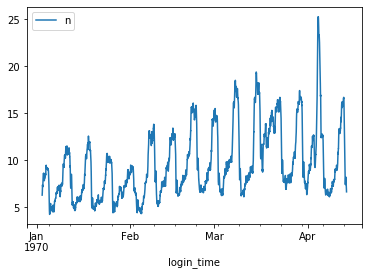

In [130]:
df_agg.rolling(window=100).mean().plot()
plt.show()

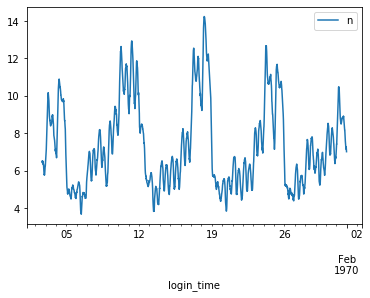

In [131]:
df_agg.loc['1970-01'].rolling(window=80).mean().plot()
plt.show()

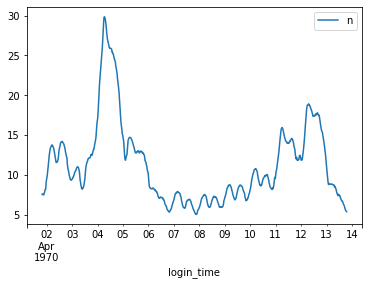

In [132]:
df_agg.loc['1970-04'].rolling(window=80).mean().plot()
plt.show()

In [133]:
60*24

1440

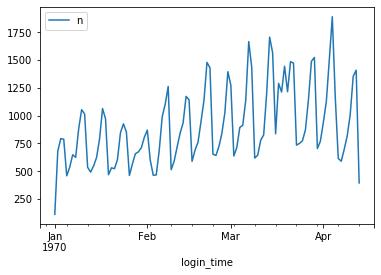

In [134]:
df.resample('1440min').sum().plot()
plt.show()

In [135]:
60*24*7

10080

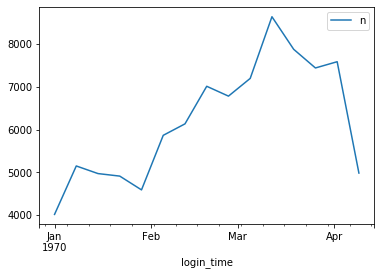

In [136]:
df.resample('10080min').sum().plot()
plt.show()

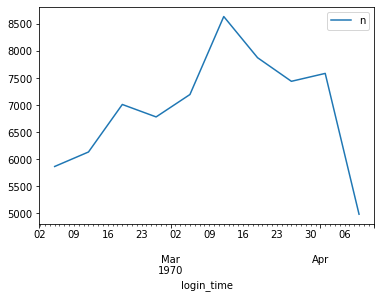

In [137]:
df.resample('10080min').sum().loc['1970-02':'1970-04'].plot()
plt.show()

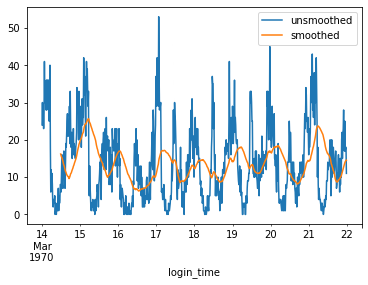

In [138]:
unsmoothed = df_agg['n']['1970-03-14':'1970-03-21']
smoothed = unsmoothed.rolling(window=48).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()